In [ ]:

import pandas as pd
import numpy as np
print("Loading D-Mart sales dataset...")
df = pd.read_csv("DMart.csv")
print("Dataset loaded successfully.\n")


print("Dataset Overview:")
print(df.info())


numeric_cols = df.select_dtypes(include=["number"]).columns
object_cols = df.select_dtypes(include=["object"]).columns


print("\nHandling missing values...")
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[object_cols] = df[object_cols].fillna(df[object_cols].mode().iloc[0])
print("Missing values have been filled.")
print("Remaining missing values in each column:\n", df.isnull().sum())


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


print("\nRemoving outliers from numeric columns...")
original_shape = df.shape
for col in numeric_cols:
    df = remove_outliers(df, col)

print(f"Outlier removal completed. Dataset reduced from {original_shape[0]} to {df.shape[0]} rows.")


print("\nCreating new column: 'Total_Price' (Quantity × Price)...")
quantity_col = None
price_col = None
for col in df.columns:
    if "quantity" in col.lower():
        quantity_col = col
    if "price" in col.lower() or "mrp" in col.lower():
        price_col = col

if quantity_col and price_col:

    df[quantity_col] = pd.to_numeric(df[quantity_col], errors='coerce').fillna(0)
    df["Total_Price"] = df[quantity_col] * df[price_col]
    print(f"'Total_Price' created using '{quantity_col}' and '{price_col}'.")
else:
    print("Could not create 'Total_Price'. Required columns not found.")

df.to_csv("dmart_sales_cleaned.csv", index=False)
print("\nData cleaning complete. Cleaned dataset saved as 'dmart_sales_cleaned.csv'.")


print("\nPreview of cleaned data:")
print(df.head())


Loading D-Mart sales dataset...
Dataset loaded successfully.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4291 non-null   object 
 1   Brand            4291 non-null   object 
 2   Price            4291 non-null   float64
 3   DiscountedPrice  4291 non-null   float64
 4   Category         4291 non-null   object 
 5   SubCategory      4291 non-null   object 
 6   Quantity         4291 non-null   float64
 7   Description      4291 non-null   object 
 8   BreadCrumbs      4291 non-null   object 
 9   Total_Price      4291 non-null   float64
dtypes: float64(4), object(6)
memory usage: 335.4+ KB
None

Handling missing values...
Missing values have been filled.
Remaining missing values in each column:
 Name               0
Brand              0
Price              0
DiscountedPrice    0
Category       

'Sales' column created from 'Total_Price'.

Descriptive Statistics for Sales:
count    4201.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Sales, dtype: float64

Additional Statistical Metrics:
Mean: 0.00
Median: 0.00
Standard Deviation: 0.00
Variance: 0.00
Range: 0.00
IQR (Interquartile Range): 0.00
Skewness: nan
Kurtosis: nan

Z-scores have been added to the dataset.

Customer Type Distribution:
Customer_Type
High-Value    4201
Name: count, dtype: int64

Average Sales by Customer Type:
Customer_Type
High-Value    0.0
Name: Sales, dtype: float64


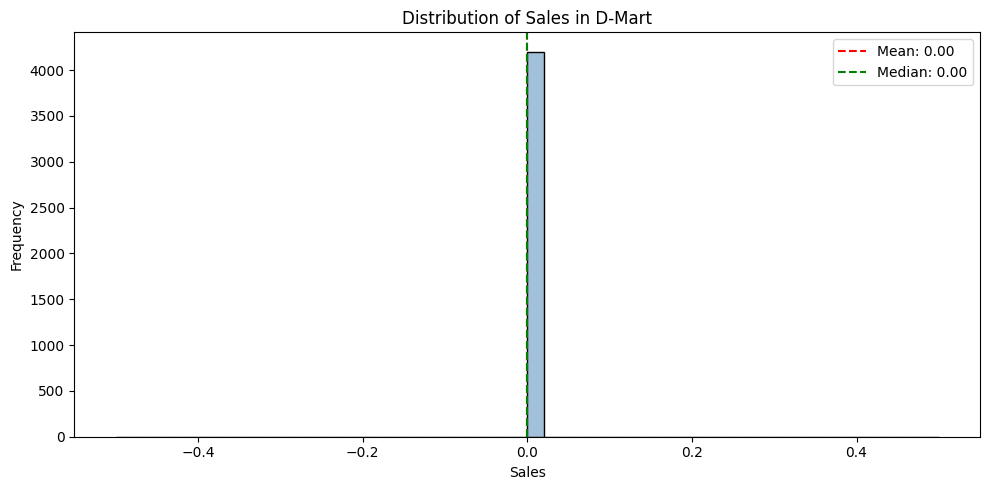

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, kurtosis


df = pd.read_csv("dmart_sales_cleaned.csv")


if 'Sales' not in df.columns:
    if 'Total_Price' in df.columns:
        df['Sales'] = df['Total_Price']
        print("'Sales' column created from 'Total_Price'.")
    else:
        raise ValueError("No 'Sales' or 'Total_Price' column found.")


print("\nDescriptive Statistics for Sales:")
print(df["Sales"].describe())


mean_sales = df["Sales"].mean()
median_sales = df["Sales"].median()
std_sales = df["Sales"].std()
var_sales = df["Sales"].var()
range_sales = df["Sales"].max() - df["Sales"].min()
iqr_sales = df["Sales"].quantile(0.75) - df["Sales"].quantile(0.25)
skew_sales = skew(df["Sales"])
kurt_sales = kurtosis(df["Sales"])

print("\nAdditional Statistical Metrics:")
print(f"Mean: {mean_sales:.2f}")
print(f"Median: {median_sales:.2f}")
print(f"Standard Deviation: {std_sales:.2f}")
print(f"Variance: {var_sales:.2f}")
print(f"Range: {range_sales:.2f}")
print(f"IQR (Interquartile Range): {iqr_sales:.2f}")
print(f"Skewness: {skew_sales:.2f}")
print(f"Kurtosis: {kurt_sales:.2f}")


df["Sales_ZScore"] = zscore(df["Sales"])
print("\nZ-scores have been added to the dataset.")


high_threshold = df["Sales"].quantile(0.75)
low_threshold = df["Sales"].quantile(0.25)

df["Customer_Type"] = np.where(
    df["Sales"] >= high_threshold, "High-Value",
    np.where(df["Sales"] <= low_threshold, "Low-Value", "Mid-Value")
)

print("\nCustomer Type Distribution:")
print(df["Customer_Type"].value_counts())

print("\nAverage Sales by Customer Type:")
print(df.groupby("Customer_Type")["Sales"].mean())


plt.figure(figsize=(10, 5))
sns.histplot(df["Sales"], bins=50, kde=True, color="steelblue")
plt.axvline(mean_sales, color='red', linestyle='--', label=f"Mean: {mean_sales:.2f}")
plt.axvline(median_sales, color='green', linestyle='--', label=f"Median: {median_sales:.2f}")
plt.title("Distribution of Sales in D-Mart")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()



Preview of cleaned data with Sales column:
                     Name   Brand  Price  DiscountedPrice Category  \
0  Premia Badam (Almonds)  Premia  451.0            329.0  Grocery   
1  Premia Badam (Almonds)  Premia  109.0             85.0  Grocery   
2  Premia Badam (Almonds)  Premia  202.0            175.0  Grocery   
3               Chana Dal  Premia   49.0             42.0  Grocery   
4               Chana Dal  Premia   96.0             80.0  Grocery   

          SubCategory  Quantity Description                   BreadCrumbs  \
0  Grocery/Dry Fruits       0.0       India  Grocery > Grocery/Dry Fruits   
1  Grocery/Dry Fruits       0.0       India  Grocery > Grocery/Dry Fruits   
2  Grocery/Dry Fruits       0.0       India  Grocery > Grocery/Dry Fruits   
3                Dals       0.0       India                Grocery > Dals   
4                Dals       0.0       India                Grocery > Dals   

   Total_Price  Sales  
0          0.0    0.0  
1          0.0    0.0  


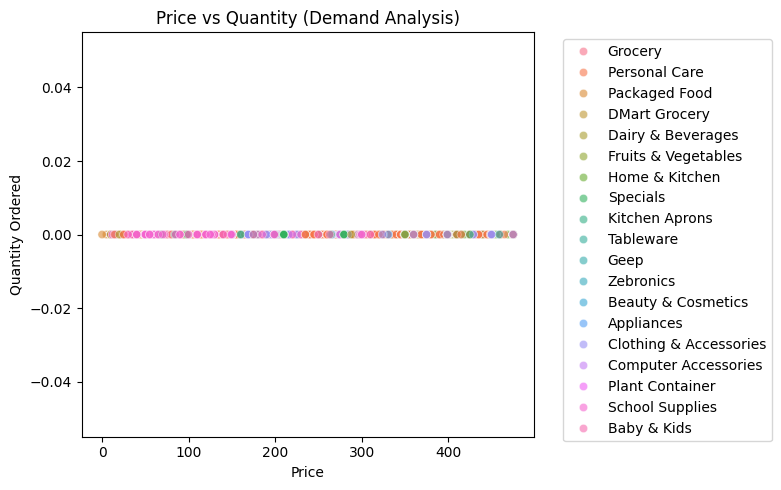

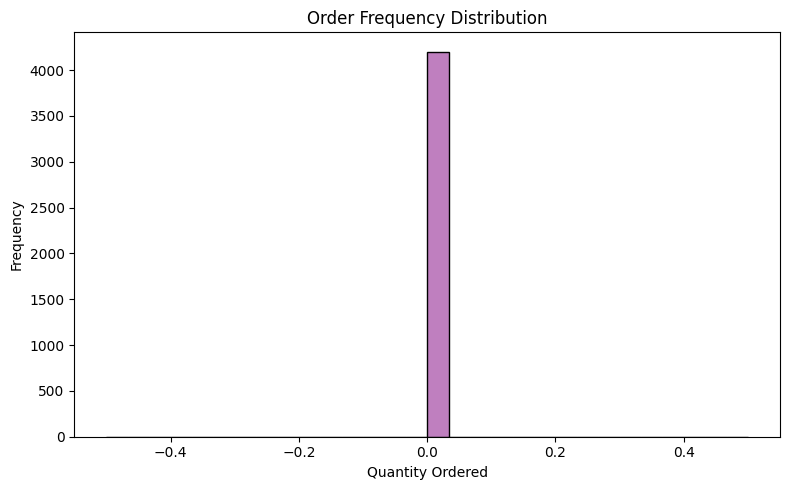

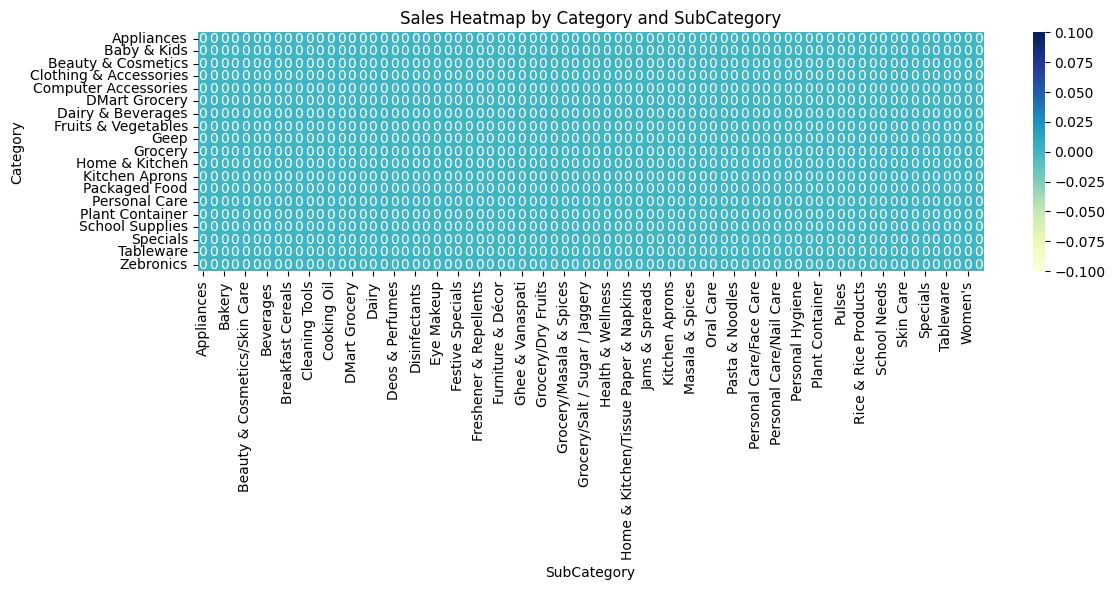

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dmart_sales_cleaned.csv")


df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['DiscountedPrice'] = pd.to_numeric(df['DiscountedPrice'], errors='coerce')

df_clean = df.dropna(subset=['Price', 'Quantity', 'Category', 'SubCategory', 'DiscountedPrice'])

if 'Sales' not in df_clean.columns:
    df_clean['Sales'] = df_clean['Quantity'] * df_clean['DiscountedPrice']

print("\nPreview of cleaned data with Sales column:")
print(df_clean.head())


plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='Price', y='Quantity', hue='Category', alpha=0.6)
plt.title('Price vs Quantity (Demand Analysis)')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Quantity'], bins=30, kde=True, color='purple')
plt.title('Order Frequency Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

pivot = df_clean.pivot_table(values='Sales', index='Category', columns='SubCategory', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales Heatmap by Category and SubCategory')
plt.tight_layout()
plt.show()


Using 'Total_Price' as 'Sales'.
Discount column calculated.

Correlation between Discount and Sales Volume:
          Discount  Sales
Discount       1.0    NaN
Sales          NaN    NaN


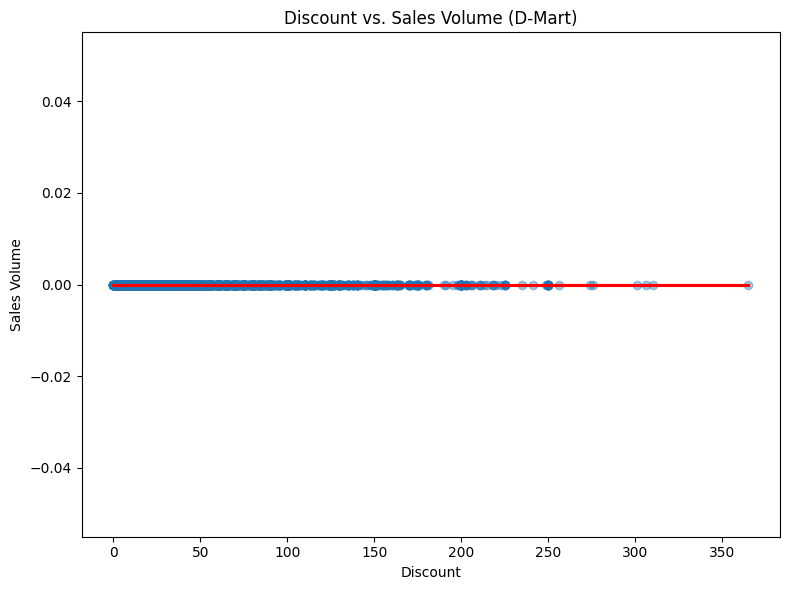

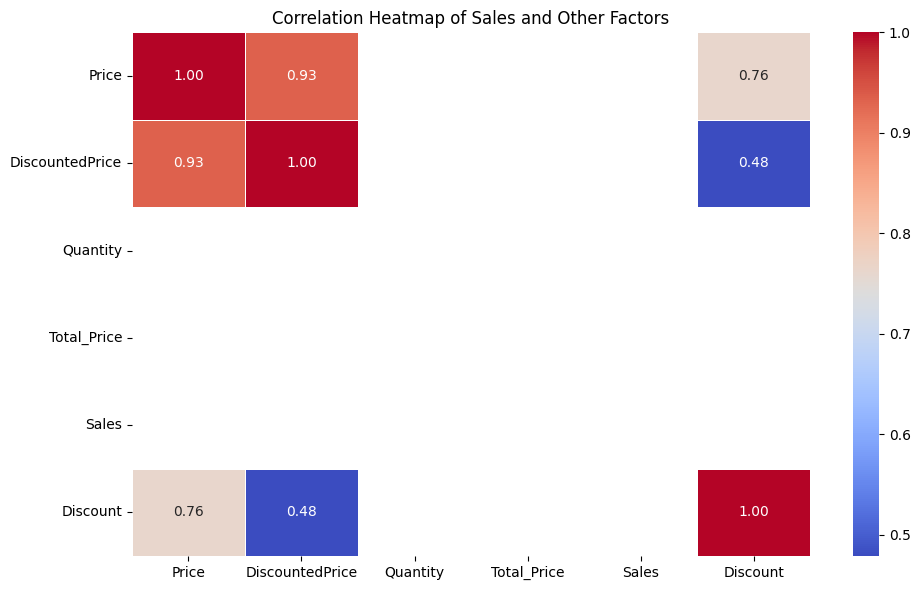

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dmart_sales_cleaned.csv")

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['DiscountedPrice'] = pd.to_numeric(df['DiscountedPrice'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# 🛒 Create Sales column if missing
if 'Sales' not in df.columns:
    if 'Total_Price' in df.columns:
        df['Sales'] = df['Total_Price']
        print("Using 'Total_Price' as 'Sales'.")
    else:
        raise ValueError("Neither 'Sales' nor 'Total_Price' column found!")

if 'Price' in df.columns and 'DiscountedPrice' in df.columns:
    df['Discount'] = df['Price'] - df['DiscountedPrice']
    print("Discount column calculated.")
else:
    raise ValueError("'Price' and/or 'DiscountedPrice' columns missing for Discount calculation.")


correlation = df[['Discount', 'Sales']].corr()
print("\nCorrelation between Discount and Sales Volume:")
print(correlation)


plt.figure(figsize=(8, 6))
sns.regplot(
    x=df['Discount'],
    y=df['Sales'],
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.xlabel('Discount')
plt.ylabel('Sales Volume')
plt.title('Discount vs. Sales Volume (D-Mart)')
plt.tight_layout()
plt.show()


numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Sales and Other Factors')
plt.tight_layout()
plt.show()


Using 'Total_Price' as 'Sales'.


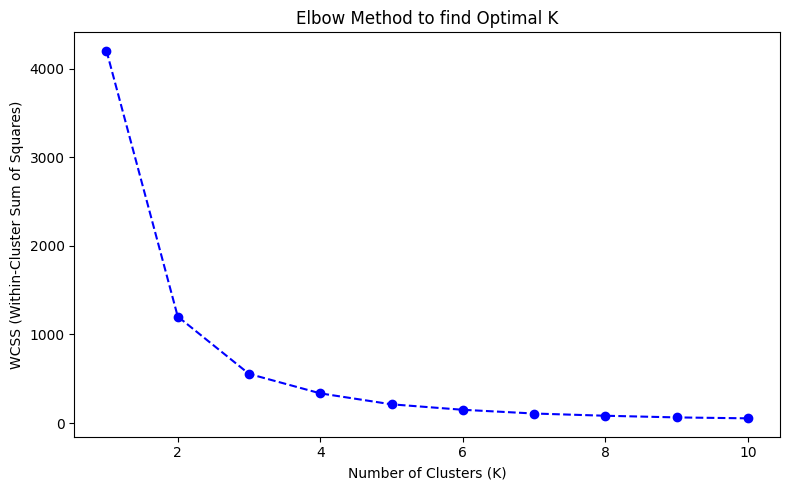

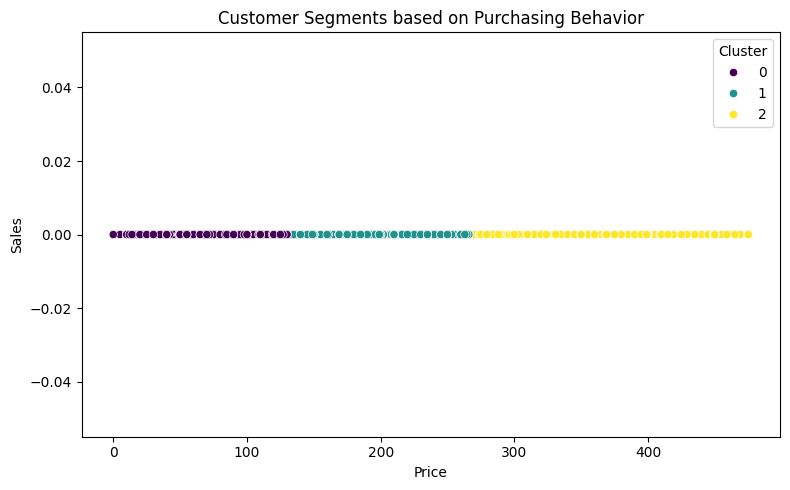

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("dmart_sales_cleaned.csv")


if 'Sales' not in df.columns:
    if 'Total_Price' in df.columns:
        df['Sales'] = df['Total_Price']
        print("Using 'Total_Price' as 'Sales'.")
    else:
        raise ValueError("Neither 'Sales' nor 'Total_Price' column found!")

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


features = ['Sales', 'Price']


for feature in features:
    if feature not in df.columns:
        raise ValueError(f"Required column '{feature}' not found!")

df_cluster = df[features].dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to find Optimal K')
plt.tight_layout()
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cluster['Price'], y=df_cluster['Sales'], hue=df_cluster['Cluster'], palette='viridis')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Customer Segments based on Purchasing Behavior')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


R² Score: 1.0
MSE: 0.0


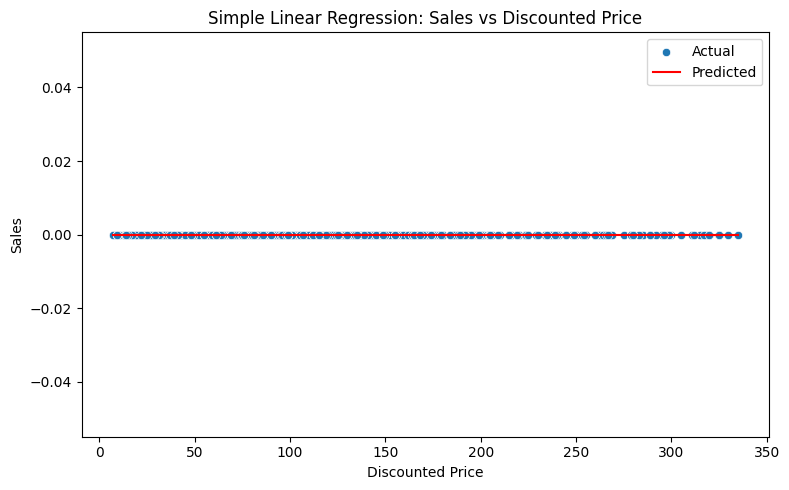

R² Score (Multiple): 1.0
MSE (Multiple): 0.0


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['DiscountedPrice'] = pd.to_numeric(df['DiscountedPrice'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

df_clean = df.dropna(subset=['Price', 'DiscountedPrice', 'Quantity'])
df_clean['Sales'] = df_clean['Quantity'] * df_clean['DiscountedPrice']
df_clean.head()

X = df_clean[['DiscountedPrice']]
y = df_clean['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['DiscountedPrice'], y=y_test, label='Actual')
sns.lineplot(x=X_test['DiscountedPrice'], y=y_pred, color='red', label='Predicted')
plt.title("Simple Linear Regression: Sales vs Discounted Price")
plt.xlabel("Discounted Price")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

X_multi = df_clean[['Price', 'DiscountedPrice']]
y_multi = df_clean['Sales']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2,
                                                    random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

print("R² Score (Multiple):", r2_score(y_test, y_pred_multi))
print("MSE (Multiple):", mean_squared_error(y_test, y_pred_multi))

R² Score: 1.0000
Mean Squared Error (MSE): 0.00
Standard Error of Estimate (SEE): 0.00


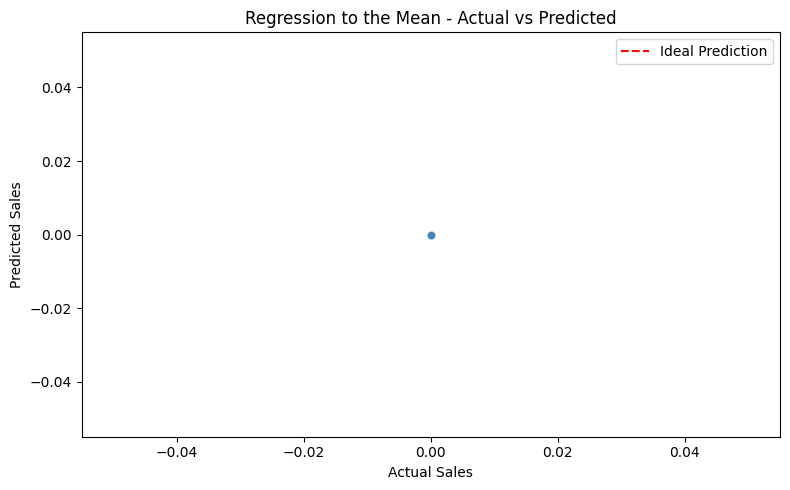

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('DMart.csv'
df.columns = df.columns.str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['DiscountedPrice'] = pd.to_numeric(df['DiscountedPrice'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

df_clean = df.dropna(subset=['Price', 'DiscountedPrice', 'Quantity'])
df_clean['Sales'] = df_clean['DiscountedPrice'] * df_clean['Quantity']

X = df_clean[['DiscountedPrice']]
y = df_clean['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
see = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Standard Error of Estimate (SEE): {see:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='steelblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--',
         label='Ideal Prediction')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Regression to the Mean - Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()